# MTH_9855_Homework_02
## Sun, Yu

### Problem. 1
#### Part. (a)

In [61]:
df <- read.csv('BetaExample.txt', sep="|")
tickers <- unique(df$TICKER)

betas <- rep(0, length(tickers))
names(betas) <- tickers

for(ticker in tickers){
    # get sub data set
    datatmp <- df[df$TICKER == ticker,]
    data <- datatmp[(as.Date(datatmp$DATE) < as.Date('01-01-2015', format = "%d-%m-%Y")),]
    # run linear regression
    model <- lm(R ~ RM + 0, data = data)
    betas[ticker] <- coef(model)
    cat("For ticker", ticker, " beta is", coef(model), "\n") 
    print(summary(model)$coefficients)
}

For ticker IBM  beta is 0.9067384 
    Estimate Std. Error  t value Pr(>|t|)
RM 0.9067384 0.01620043 55.97004        0
For ticker AAPL  beta is 1.1363 
   Estimate Std. Error  t value      Pr(>|t|)
RM   1.1363 0.02934033 38.72828 1.606052e-294
For ticker TSLA  beta is 1.310085 
   Estimate Std. Error  t value     Pr(>|t|)
RM 1.310085   0.104407 12.54786 6.510896e-34


<font color = 'blue'>
For all three, the t value is large, we'll reject the null hypothesis that $\beta = 0 $

#### Part. (b)

In [62]:
M <- matrix(0, length(tickers), 3)

rownames(M) <- tickers
colnames(M) <- c('AAPL', 'BETA', 'INTERCEPT')

M['AAPL', 'AAPL'] <- 1.0

for(ticker in tickers){
    M[ticker, 'BETA'] <- betas[ticker]
} 
M[,'INTERCEPT'] <- 1.0

v <- rep(0, 3)
names(v) <- c('AAPL', 'BETA', 'INTERCEPT')
v['AAPL'] <- 1.0

h <- solve(t(M), v)
print(h)

       IBM       AAPL       TSLA 
-0.4308561  1.0000000 -0.5691439 


#### Part. (c)

NULL


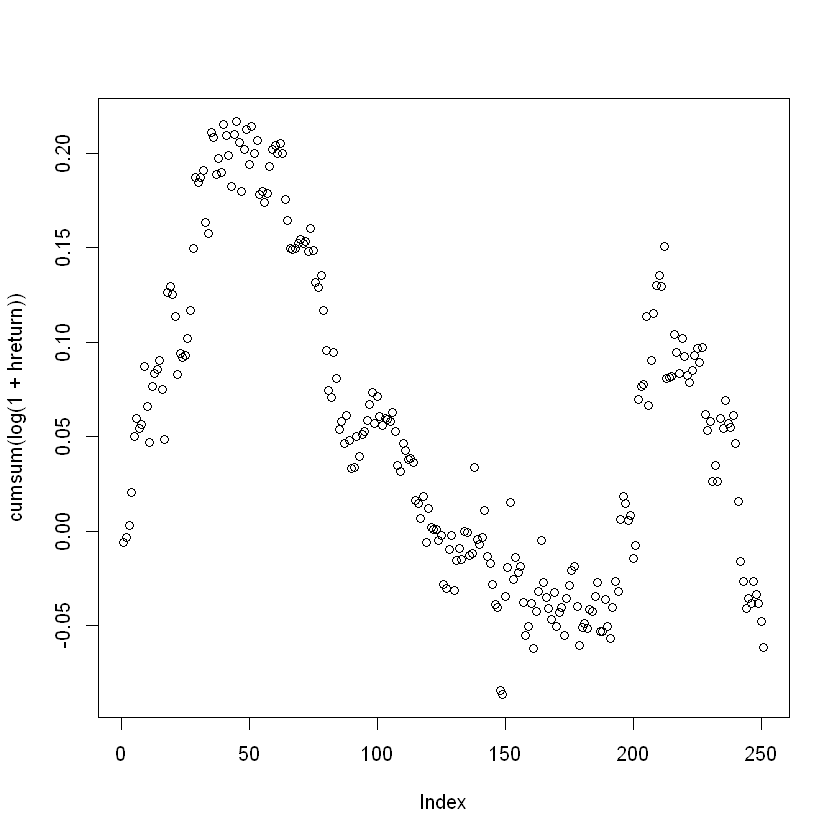

In [97]:
library(reshape2)

test <- df[(as.Date(df$DATE) > as.Date('31-12-2014',format = "%d-%m-%Y")),]
testdata <- dcast(test, DATE ~ TICKER, value.var = 'R')
testdata2 <- testdata[, c("IBM", "AAPL", "TSLA")]

hreturn <- as.matrix(testdata2) %*% h
print(plot(cumsum(log(1.0 + hreturn))))

#### Part. (d)

In [113]:
RM <- dcast(test, DATE ~ TICKER, value.var = 'RM')$IBM
print(cor(hreturn, RM))
result <- lm(hreturn ~ RM + 0)
print(summary(result)$coefficients)

           [,1]
[1,] 0.02919532
    Estimate Std. Error   t value  Pr(>|t|)
RM 0.0547973  0.1187618 0.4614051 0.6449092


<font color = 'blue'>
The p value is large, so we fail to reject the null hypothesis that correlation is 0.

### Problem. 2

<font color = 'blue'>
The Woodbury matrix identity is 
$$
\left(A+UCV\right)^{-1}=A^{-1}-A^{-1}U\left(C^{-1}+VA^{-1}U\right)^{-1}VA^{-1}
$$

Subsitute $A=D$, $U=X$, $C=F$, $V=X'$.


When $\Sigma = XFX' + D $, we have
$$
\Sigma^{-1} = 
\left(XFX'+D\right)^{-1}=\\
D^{-1}-D^{-1}X\left(F^{-1}+X'D^{-1}X\right)^{-1}X'D^{-1}
$$


### Problem. 3

<font color = 'blue'>
We will have singular-value decomposition on $X$ and get $X=USV'$. Assume $rank(X) = r$, so $S = diag(s_1,s_2,...,s_r,0,...0)$

$$
lim_{\delta\rightarrow0^{+}}\left(X'X+\delta I\right)^{-1}X'Y	=lim_{\delta\rightarrow0^{+}}\left(S'S+\delta I\right)^{-1}VSU'Y\\
	=lim_{\delta\rightarrow0^{+}}Vdiag\left(\frac{s_{1}}{s_{1}^{2}+\delta},...,\frac{s_{r}}{s_{r}^{2}+\delta},0,...,0\right)U'Y\\
	=Vdiag\left(\frac{1}{s_{1}},...,\frac{1}{s_{r}},0,...,0\right)U'Y\\
	=VS^{+}U'Y
$$
if we define $S^+ = diag\left(\frac{1}{s_{1}},...,\frac{1}{s_{r}},0,...,0\right)$.

So we proved (1) and (3) are equal.

For (2), we know b is a solution iff $X'(Y-Xb)=0$. Assume (3) is a solution, we have
$$
X'(Y-XVS^{+}U'Y) = X'Y - VS^2S^+U'Y \\
=X'Y - VSU'Y\\
=X'Y - X'Y\\
=0$$

Also we could prove $VS^{+}U'Y$ is smallest because for any solution b, we have
$$
	\parallel b\parallel^{2}=\parallel b+VS^{+}U'Y-VS^{+}U'Y\parallel^{2}\\
	=\parallel VS^{+}U'Y\parallel^{2}+\parallel b-VS^{+}U'Y\parallel^{2}+2\left(b-VS^{+}U'Y\right)'VS^{+}U'Y\\
	=\parallel VS^{+}U'Y\parallel^{2}+\parallel b-VS^{+}U'Y\parallel^{2}+2\left(b-VS^{+}U'Y\right)'X'XV\left(S^{+}\right)^{3}U'Y\\
	=\parallel VS^{+}U'Y\parallel^{2}+\parallel b-VS^{+}U'Y\parallel^{2}+2\left(X'X\left(b-VS^{+}U'Y\right)\right)'V\left(S^{+}\right)^{3}U'Y\\
	=\parallel VS^{+}U'Y\parallel^{2}+\parallel b-VS^{+}U'Y\parallel^{2}+2\left(X'Xb-X'Y\right)'V\left(S^{+}\right)^{3}U'Y\\
	=\parallel VS^{+}U'Y\parallel^{2}+\parallel b-VS^{+}U'Y\parallel^{2}+0\\
	\geq\parallel VS^{+}U'Y\parallel^{2}
    $$
    
So we proved (2) and (3) are equal.